# **Example: Calculating Underground Energy Spectra and Mean Underground Energies**

This file demonstrates how to use MUTE to calculate underground energy spectra and mean underground energies for a lab under a flat overburden and for a lab under a mountain using daemonflux as the surface flux model.

## Import Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import mute.constants as mtc
import mute.underground as mtu

*************************************************************************
*                                                                       *
*                ███████████████████████████████████████                *
*                ▓  ▓▓▓▓  ▓▓  ▓▓▓▓  ▓▓        ▓▓       ▓                *
*                ▓   ▓▓   ▓▓  ▓▓▓▓  ▓▓▓▓▓  ▓▓▓▓▓  ▓▓▓▓▓▓                *
*                ▒        ▒▒  ▒▒▒▒  ▒▒▒▒▒  ▒▒▒▒▒       ▒                *
*                ▒  ▒  ▒  ▒▒  ▒▒▒▒  ▒▒▒▒▒  ▒▒▒▒▒  ▒▒▒▒▒▒                *
*                ░  ░░░░  ░░░░    ░░░░░░░  ░░░░░       ░                *
*                ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░                *
*                   https://github.com/wjwoodley/mute                   *
*                                                                       *
* Author:  William Woodley                                              *
* Version: 3.0.0                                                        *
*                                     

## Set the Global Constants

In [2]:
mtc.set_verbose(2)
mtc.set_output(False)
mtc.set_lab("Example")
mtc.set_n_muon(1000000)

## Calculations for a Flat Overburden

In order to calculate the underground energy spectrum for a flat overburden, the constants for a flat overburden must be set.

### Set the Constants

In [3]:
mtc.set_overburden("flat")
mtc.set_vertical_depth(3)
mtc.set_medium("rock")
mtc.set_reference_density(2.65)

### Calculate the Energy Spectrum

Energy spectra are calculated by calling the ``mtu.calc_u_e_spect()`` function. The function returns an array of the underground energy spectrum values corresponding to the energy bins in ``mtc.ENERGIES``. Like with other MUTE functions, the surface flux model can be defined with the ``model`` parameter, with possible values being either ``"daemonflux"`` or ``"mceq"``. If the model is set to ``"daemonflux"``, the ``return_error`` Boolean flag can be used; if it is set to ``"mceq"``, the primary model can be specified with the ``primary_model`` parameter, and the hadronic interaction model can be specified with the ``interaction_model`` parameter.

In [4]:
flat_u_e_spect = mtu.calc_u_e_spect(model = "daemonflux")

Calculating underground fluxes.
Loading surface fluxes for daemonflux.
Loaded surface fluxes.
Loading survival probabilities from data/survival_probabilities/rock_2.65_1000000_survival_probabilities.npy.
Loaded survival probabilities.
Finished calculating underground fluxes.


In [5]:
print(flat_u_e_spect)

[0.00000000e+00 5.26878271e-14 1.47067153e-13 2.01562949e-13
 2.27988583e-13 2.47785106e-13 2.53868841e-13 2.53722086e-13
 2.46284399e-13 2.44741021e-13 2.36138943e-13 2.30379217e-13
 2.23250452e-13 2.19360342e-13 2.16385360e-13 2.07168702e-13
 2.03527829e-13 1.96653111e-13 1.93322680e-13 1.85291017e-13
 1.79362123e-13 1.74709992e-13 1.68731020e-13 1.60242114e-13
 1.54962576e-13 1.47966042e-13 1.40330417e-13 1.30804765e-13
 1.20579012e-13 1.07924884e-13 9.37600641e-14 7.85639903e-14
 6.52949173e-14 5.39966705e-14 4.25995954e-14 3.13728667e-14
 2.25916159e-14 1.56948085e-14 1.01915204e-14 6.42587386e-15
 3.82890603e-15 2.18258934e-15 1.19993043e-15 6.32007157e-16
 3.21065238e-16 1.58110246e-16 7.58555009e-17 3.55943395e-17
 1.63845162e-17 7.40936883e-18 3.31511016e-18 1.46288653e-18
 6.42157096e-19 2.79445520e-19 1.20503261e-19 5.19247536e-20
 2.22288355e-20 9.49156039e-21 4.03005682e-21 1.70865610e-21
 7.21534885e-22 3.04028579e-22 1.27788377e-22 5.36780158e-23
 2.25510969e-23 9.511514

### Calculate the Mean Energies

Mean and median energies are calculated by calling the ``mtu.calc_u_mean_e()`` function. The function returns an array of mean and median energies and confidence intervals (as described in [``Tutorial.md``](../docs/Tutorial.md)). Like with other MUTE functions, the surface flux model can be defined with the ``model`` parameter, with possible values being either ``"daemonflux"`` or ``"mceq"``. If the model is set to ``"daemonflux"``, the ``return_error`` Boolean flag can be used; if it is set to ``"mceq"``, the primary model can be specified with the ``primary_model`` parameter, and the hadronic interaction model can be specified with the ``interaction_model`` parameter.

In [6]:
flat_u_energies = mtu.calc_u_mean_e(model = "daemonflux")

Calculating underground fluxes.
Loading surface fluxes for daemonflux.
Loaded surface fluxes.
Survival probabilities already loaded for rock with density 2.65 gcm^-3 and 1000000 muons.
Finished calculating underground fluxes.
Calculating mean underground energies.
Finished calculating mean underground energies.


The mean energy is stored in the zeroth element of the array. Divide by ``1e3`` to convert from [MeV] to [GeV].

In [7]:
print(np.round(flat_u_energies[0]/1e3, 2))

287.92


The mean energy under a flat overburden of 3 km.w.e. of standard rock is 287.9 GeV.

## Calculate the Mountain Underground Energy Spectrum

In order to calculate the underground energy spectrum for a lab under a mountain, the constants for a mountainous overburden must be set. Here, Y2L will be used as an example. The medium, reference density, and mountain map for Y2L are used as described in [``Tutorial_Labs``](/docs/Tutorial_Labs.md).

### Set the Constants

In [8]:
mtc.set_overburden("mountain")
mtc.set_medium("y2l_rock")
mtc.set_reference_density(2.7)
mtc.load_mountain("Y2L")

Setting overburden to mountain and resetting flat overburden constants.


/tmp/ipykernel_13455/1311854600.py:3: UserWarning: Changing the reference density will trigger the computation of new transfer tensors (for advanced users).
  mtc.set_reference_density(2.7)


### Calculate the Energy Spectrum

In [9]:
mountain_u_e_spect = mtu.calc_u_e_spect(model = "daemonflux")

Calculating underground fluxes.
Loading surface fluxes for daemonflux.
Loaded surface fluxes.
Loading survival probabilities from data/survival_probabilities/y2l_rock_2.7_1000000_survival_probabilities.npy.
Loaded survival probabilities.
Finished calculating underground fluxes.


In [10]:
print(mountain_u_e_spect)

[0.00000000e+00 9.57277998e-13 2.94484937e-12 3.95076387e-12
 4.67032199e-12 4.81105663e-12 5.02490711e-12 4.98285007e-12
 4.90702798e-12 4.69539870e-12 4.77306055e-12 4.55305757e-12
 4.54721886e-12 4.39812019e-12 4.23673151e-12 4.17279656e-12
 4.07422964e-12 3.96412067e-12 3.83189079e-12 3.69817020e-12
 3.53345660e-12 3.42042527e-12 3.27755173e-12 3.11313854e-12
 2.94125483e-12 2.75045555e-12 2.53931218e-12 2.28490377e-12
 2.01457019e-12 1.81145315e-12 1.58577080e-12 1.24080807e-12
 9.25905067e-13 7.96237249e-13 5.74150895e-13 3.79715739e-13
 2.83463037e-13 1.68824395e-13 1.08461121e-13 6.49584416e-14
 3.53611550e-14 1.94676321e-14 1.03095497e-14 5.19958915e-15
 2.54010706e-15 1.21138286e-15 5.66643184e-16 2.60465134e-16
 1.17682111e-16 5.25859985e-17 2.32291952e-17 1.01864677e-17
 4.43448445e-18 1.92111686e-18 8.27484054e-19 3.55318596e-19
 1.51992455e-19 6.47437570e-20 2.75348004e-20 1.16718489e-20
 4.92988641e-21 2.08074026e-21 8.73496490e-22 3.65963044e-22
 1.53093768e-22 6.380493

### Calculate the Mean Energies

In [11]:
mountain_u_energies = mtu.calc_u_mean_e(model = "daemonflux")

Calculating underground fluxes.
Loading surface fluxes for daemonflux.
Loaded surface fluxes.
Survival probabilities already loaded for y2l_rock with density 2.7 gcm^-3 and 1000000 muons.
Finished calculating underground fluxes.
Calculating mean underground energies.
Finished calculating mean underground energies.


The mean energy is stored in the zeroth element of the array. Divide by ``1e3`` to convert from [MeV] to [GeV].

In [12]:
print(np.round(mountain_u_energies[0]/1e3, 2))

211.16


The mean energy at the Y2L laboratory is 211.2 GeV.

## Plot the Results

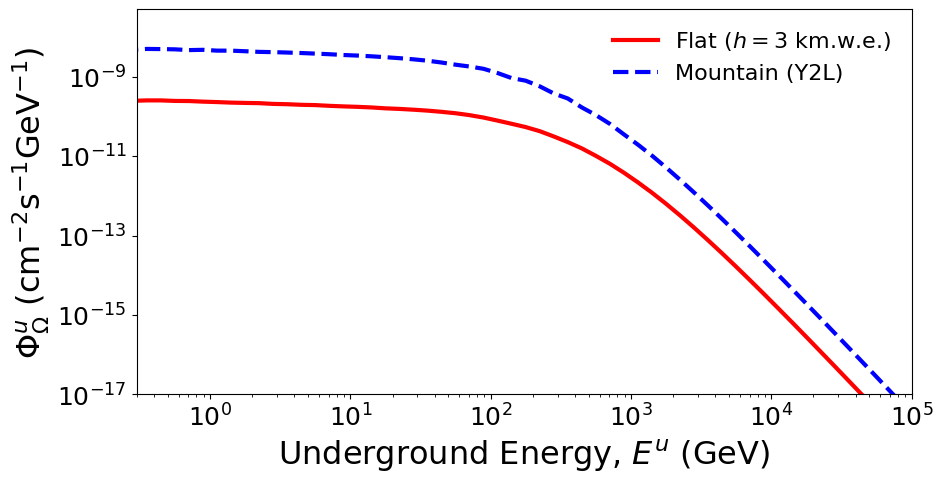

In [13]:
fig = plt.figure(figsize = (10, 5))
ax  = fig.add_subplot(111)

ax.loglog(mtc.ENERGIES/1e3, 1e3*flat_u_e_spect, color = "red", lw = 3, ls = "-", label = "Flat ($h=3$ km.w.e.)")
ax.loglog(mtc.ENERGIES/1e3, 1e3*mountain_u_e_spect, color = "blue", lw = 3, ls = "--", label = "Mountain (Y2L)")

ax.set_xlabel(r"Underground Energy, $E^u$ (GeV)", fontsize = 23)
ax.set_ylabel(r"$\Phi^u_{\Omega}$ (cm$^{-2}$s$^{-1}$GeV$^{-1}$)", fontsize = 23)
ax.tick_params(axis = "both", which = "major", labelsize = 18)
ax.set_xlim([3e-1, 1e5])
ax.set_ylim([1e-17, 5e-8])

plt.legend(frameon = False, fontsize = 16)

plt.show()